# TAL Labo 1c : mêmes opérations sur une page web en anglais

**Objectif** 

Dans cette troisième partie du Labo1, vous allez refaire une partie des traitements de la partie 1b, mais cette fois-ci sur une page web, spécifiquement une page Wikipedia en anglais (suggestion : "Switzerland").  L'objectif est de réviser les principales commandes apprises, et de traiter le format HTML.

In [1]:
import nltk
import os
from urllib import request
import matplotlib.pyplot 
%matplotlib inline
#nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oscar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

S'inspirer du [chapitre 3 du livre NLTK](http://www.nltk.org/book/ch03.html) pour faire une requête et récupérer le contenu de la page indiquée dans `url2`.  Quelle est la longueur de la chaîne de caractères obtenue ?

In [2]:
url2 = "https://en.wikipedia.org/wiki/Switzerland" 
response = request.urlopen(url2)
html2 = response.read().decode('utf-8')
len(html2)

938695

Nous utilserons l'outil `BeautifulSoup` disponible sous forme de module Python pour extraire tout le texte de la page HTML.  Si le contenu de la page est stocké dans `html2`, nous extrayons le texte dans `raw2`.

In [3]:
from bs4 import BeautifulSoup
import re

In [4]:
raw2 = BeautifulSoup(html2).get_text()
len(raw2)

161615

Réutilisez la méthode de la partie 1b pour enlever le début et la fin de la chaîne `raw2`, car ils contiennent du texte qui n'est pas pertinent pour notre analyse ("ne parle pas de la Suisse").  Quelle est la longueur du résultat ? Afficher aussi ses 100 premiers et 100 derniers caractères (p.ex. `raw2trimmed`).

In [5]:
# Please write your Python code below and execute it.
cropped = raw2[raw2.find("Switzerland, officially the Swiss Confederation"):raw2.rfind("is the main variety produced in Ticino")]
stripped = cropped.replace('\r', '').replace('\n', ' ')
raw2trimmed = re.sub(r'\s+', ' ', stripped)
raw2trimmed[:100] 
raw2trimmed[(len(raw2trimmed)-100):len(raw2trimmed)]

'. The most widespread varieties are the Chasselas (called Fendant in Valais) and Pinot Noir. Merlot '

Effectuer la segmentation en phrases, puis tokeniser chaque phrase.  Ecrivez le résultat (une phrase par ligne, espaces entre *tokens*) dans un fichier `sample_web_page.txt` et inspectez-le avec un éditeur de texte.  Observez-vous des imperfections ?

In [6]:
filename = "sample_web_page.txt"
# Pour un fichier local : chemin relatif par rapport au notebook
# Pour Google Colab, p.ex.: /content/gdrive/My Drive/sample_web_page.txt
if os.path.exists(filename): 
    os.remove(filename)
sentences = nltk.tokenize.sent_tokenize(raw2trimmed, language='french')

with open(filename, 'a', encoding='utf8') as fd:
    # Please write your Python code below and execute it.
    for sentence in sentences : 
        fd.write(sentence+"\n")


Effectuer maintenant la tokenisation de cette page **sans** faire de segmentation en phrases.  Stockez le résultat dans une variable (p.ex. `words2`) sans écrire de fichier.  Combien de tokens possède ce texte ?

In [7]:
# Please write your Python code below and execute it.
words2 = nltk.tokenize.word_tokenize(raw2trimmed)
len(words2)

16838

Créez un objet de type nltk.Text à partir de la liste de *tokens* `words2`.  Appliquez-lui à titre d'exemple les méthodes `concordance`, `similar` et `collocations`. 


In [8]:
# Please write your Python code below and execute it.
text = nltk.Text(words2)
text.concordance("Switzerland")

Displaying 25 of 215 matches:
 Switzerland , officially the Swiss Confederat
a and Liechtenstein to the east . Switzerland is geographically divided among t
ürich , Geneva and Basel . [ 14 ] Switzerland originates from the Old Swiss Con
the Peace of Westphalia in 1648 . Switzerland has maintained a policy of armed 
vement in peace building . [ 15 ] Switzerland is the birthplace of the Red Cros
le market and the Schengen Area . Switzerland is a federal republic composed of
based in Bern . [ a ] [ 2 ] [ 1 ] Switzerland is one of the world 's most devel
 GDP ) per capita . [ 17 ] [ 18 ] Switzerland ranks first in the Human Developm
icity , and religion , leading to Switzerland being described as a Willensnatio
Due to its linguistic diversity , Switzerland is known by multiple native names
 Etymology Main article : Name of Switzerland The English name Switzerland is a
e of Switzerland The English name Switzerland is a portmanteau of Switzer , an 
 14th century . The data code for Switzerla

In [9]:
text.similar("Switzerland")

the and basel europe it to population geneva countries gdp ad in
nations with bern while under mediation september gaeta


In [10]:
text.collocations()

citation needed; Main article; United Nations; Main articles; St.
Gallen; Federal Council; European Union; Swiss Plateau; Federal
Assembly; direct democracy; per capita; See also; Red Cross; European
countries; bilateral agreements; Holy Roman; Statistical Office;
Catholic Church; Swiss Confederacy; Helvetic Republic


Déterminez le vocabulaire de cette page (la liste des _types_) en convertissant la liste des _tokens_ en un `set`.  
* Veuillez calculer ainsi le vocabulaire de votre texte.
* Combien de mots différents a-t-il ?  (En incluant les ponctuations et tout autre symbole.) 
* Quels sont les mots qui ont plus de 15 lettres ?  (Ou une autre taille qui vous semble intéressante.)

In [16]:
# Please write your Python code below and execute it.
s = set()
for w in words2 :
    s.add(w)
print(len(s))

4062


In [12]:
list({s for s in s if len(s) >= 15})

['Gallen-Altenrhein',
 'protectionism—a',
 'SwitzerlandSwiss',
 'Competitiveness',
 'well-stockpiled',
 'Geneva–Lausanne',
 'counterproposal',
 'non-German-speaking',
 'machines/electronics',
 'post-compulsory',
 'Italian-speaking',
 'German-language',
 'Non-Proliferation',
 'instruments/watches',
 'Baume-Schneider',
 'energy-producing',
 'personification',
 'Telecommunication',
 'authoritarianism',
 'German-speaking',
 'near-Mediterranean',
 'French-speaking',
 'internationally',
 'hydroelectricity',
 'Franco-Prussian',
 'characteristics',
 'Axis-controlled',
 'policies—contributes',
 'Helvetica—frequently',
 'Basel-Landschaft',
 'Weiterentwicklung',
 'Romansh-speaking',
 '57.1-kilometre-long',
 'French-language',
 'pastures/grazing',
 'commander-in-chief',
 'representatives',
 'Switzerland–European',
 'colour-reversed',
 'autobahn/autoroute',
 'Donau-Iller-Rhine-Limes',
 'self-government',
 'Sonderbundskrieg',
 'Schweizerspende',
 'Franco-Provençal',
 'competitiveness']

Construisez un objet `FreqDist` avec les mots de cette page, en convertissant en minuscules tous les mots contenant seulement des lettres (utilisez la méthode `.isalpha()` de Python).  Quels sont les 30 mots les plus fréquents ?

In [13]:
# Please write your Python code below and execute it.
from nltk.probability import FreqDist
fdist = FreqDist()
for w in words2:
    if(w.isalpha()):
        fdist[w.lower()] += 1
fdist.pformat(30)

"FreqDist({'the': 1123, 'of': 547, 'and': 439, 'in': 438, 'to': 226, 'switzerland': 215, 'a': 181, 'swiss': 178, 'is': 145, 'as': 103, 'federal': 93, 'by': 89, 'are': 88, 'was': 87, 'for': 84, 'with': 75, 'from': 70, 'it': 56, 'world': 52, 'on': 49, 'at': 49, 'has': 45, 'its': 43, 'most': 42, 'population': 40, 'other': 39, 'cantons': 38, 'one': 38, 'an': 37, 'that': 37, ...})"

Affichez le graphique cumulatif du nombre d'occurrences des 70 mots les plus fréquents de votre texte.

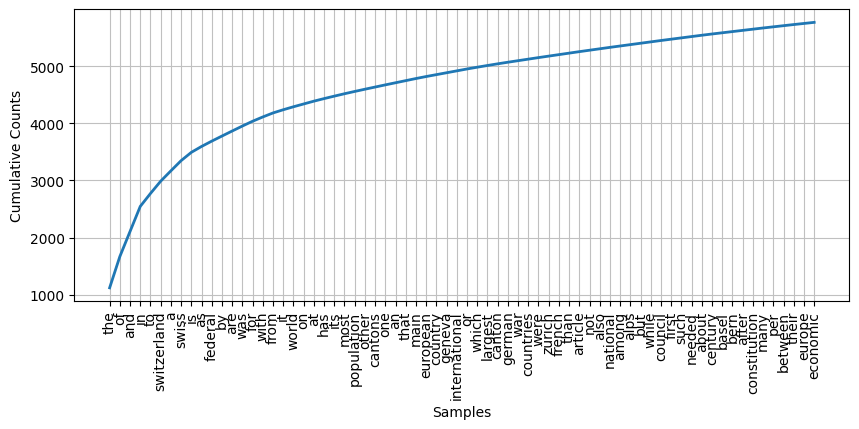

In [14]:
# Please write your Python code below and execute it.
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,4))
plt.gcf().subplots_adjust(bottom=0.15) # to avoid x-ticks cut-off
fdist.plot(70, cumulative=True)
plt.show()

Construisez une liste avec la longueur de chaque token du texte, créez un nouvel objet `FreqDist` à partir de cette liste, et affichez la distribution (non-cumulative) des nombres d'occurrences pour chaque longueur.  Qu'observez-vous ?

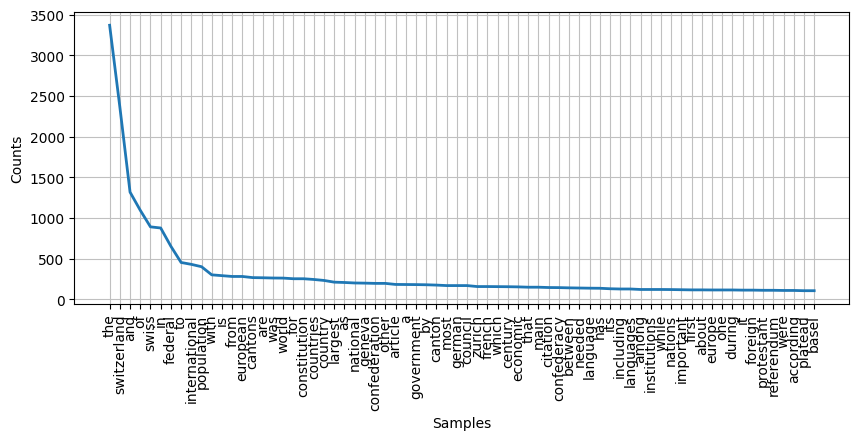

In [15]:
# Please write your Python code below and execute it.
fdist2 = FreqDist()
for w in words2:
    if(w.isalpha()):
        fdist2[w.lower()] += len(w)

import matplotlib.pyplot as plt
fig2 = plt.figure(figsize = (10,4))
plt.gcf().subplots_adjust(bottom=0.15) # to avoid x-ticks cut-off
fdist2.plot(70)
plt.show()

## Fin de la partie 1c du Labo1
Veuillez nettoyer autant que possible ce _notebook_, exécutez une dernière fois toutes les cellules pour obtenir les résultats demandés, et enregistrez le _notebook_.  Puis ajoutez-le dans une archive _zip_ avec les _notebook_ des parties 1b et 1d, et soumettez l'archive individuellement sur Cyberlearn (_Laboratoire 1_). 